In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from matplotlib import pyplot as plt
%matplotlib notebook
from statsmodels.graphics.factorplots import interaction_plot

In [6]:
DF=pd.read_csv('SalaryData.csv')
DF

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.


#### 
Ho = Salary has dependency on Educational qualification and occupation

Ha = Salary doesn't have dependency on Educational qualification and occupation

In [50]:
DF.head()

,Occupation,Salary
Education,,
Doctorate,Adm-clerical,153197
Doctorate,Adm-clerical,115945
Doctorate,Adm-clerical,175935
Doctorate,Adm-clerical,220754
Doctorate,Sales,170769


In [51]:
DF.shape

(40, 2)

In [53]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries,  Doctorate to  Doctorate
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Occupation  40 non-null     object
 1   Salary      40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [54]:
DF.describe(include='all')

,Occupation,Salary
count,40,40.000000
unique,4,NaN
top,Prof-specialty,NaN
freq,13,NaN
mean,NaN,162186.875000
std,NaN,64860.407506
min,NaN,50103.000000
25%,NaN,99897.500000
50%,NaN,169100.000000
75%,NaN,214440.750000


In [59]:
DF.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [60]:
formula = 'Salary ~ C(Education)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [61]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


<IPython.core.display.Javascript object>


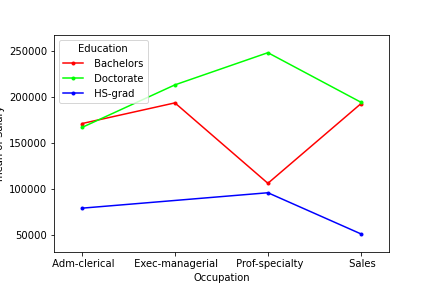

In [8]:
interaction_plot(DF['Occupation'],DF['Education'],DF['Salary'])
plt.show()

In [81]:
formula = 'Salary ~ C(Occupation) + C(Education)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,2.284576,9.648715e-02
C(Education),2.0,9.695663e+10,4.847831e+10,29.510933,3.708479e-08
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [83]:
formula = 'Salary ~ C(Occupation) + C(Education)+ C(Occupation):C(Education)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,5.277862,4.993238e-03
C(Education),2.0,9.695663e+10,4.847831e+10,68.176603,1.090908e-11
C(Occupation):C(Education),6.0,3.523330e+10,5.872217e+09,8.258287,2.913740e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [77]:
df=pd.read_csv('Education+-+Post+12th+Standard.csv')
df

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [17]:
df_reference=pd.read_excel('Data Dictionary.xlsx')
df_reference

,1) Names: Names of various university and colleges
0,2) Apps: Number of applications received
1,3) Accept: Number of applications accepted
2,4) Enroll: Number of new students enrolled
3,5) Top10perc: Percentage of new students ...
4,6) Top25perc: Percentage of new students ...
5,7) F.Undergrad: Number of full-time under...
6,8) P.Undergrad: Number of part-time under...
7,9) Outstate: Number of students for whom ...
8,10) Room.Board: Cost of Room and board
9,11) Books: Estimated book costs for a student


In [11]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  777 
no. of columns:  18


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [19]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

<IPython.core.display.Javascript object>


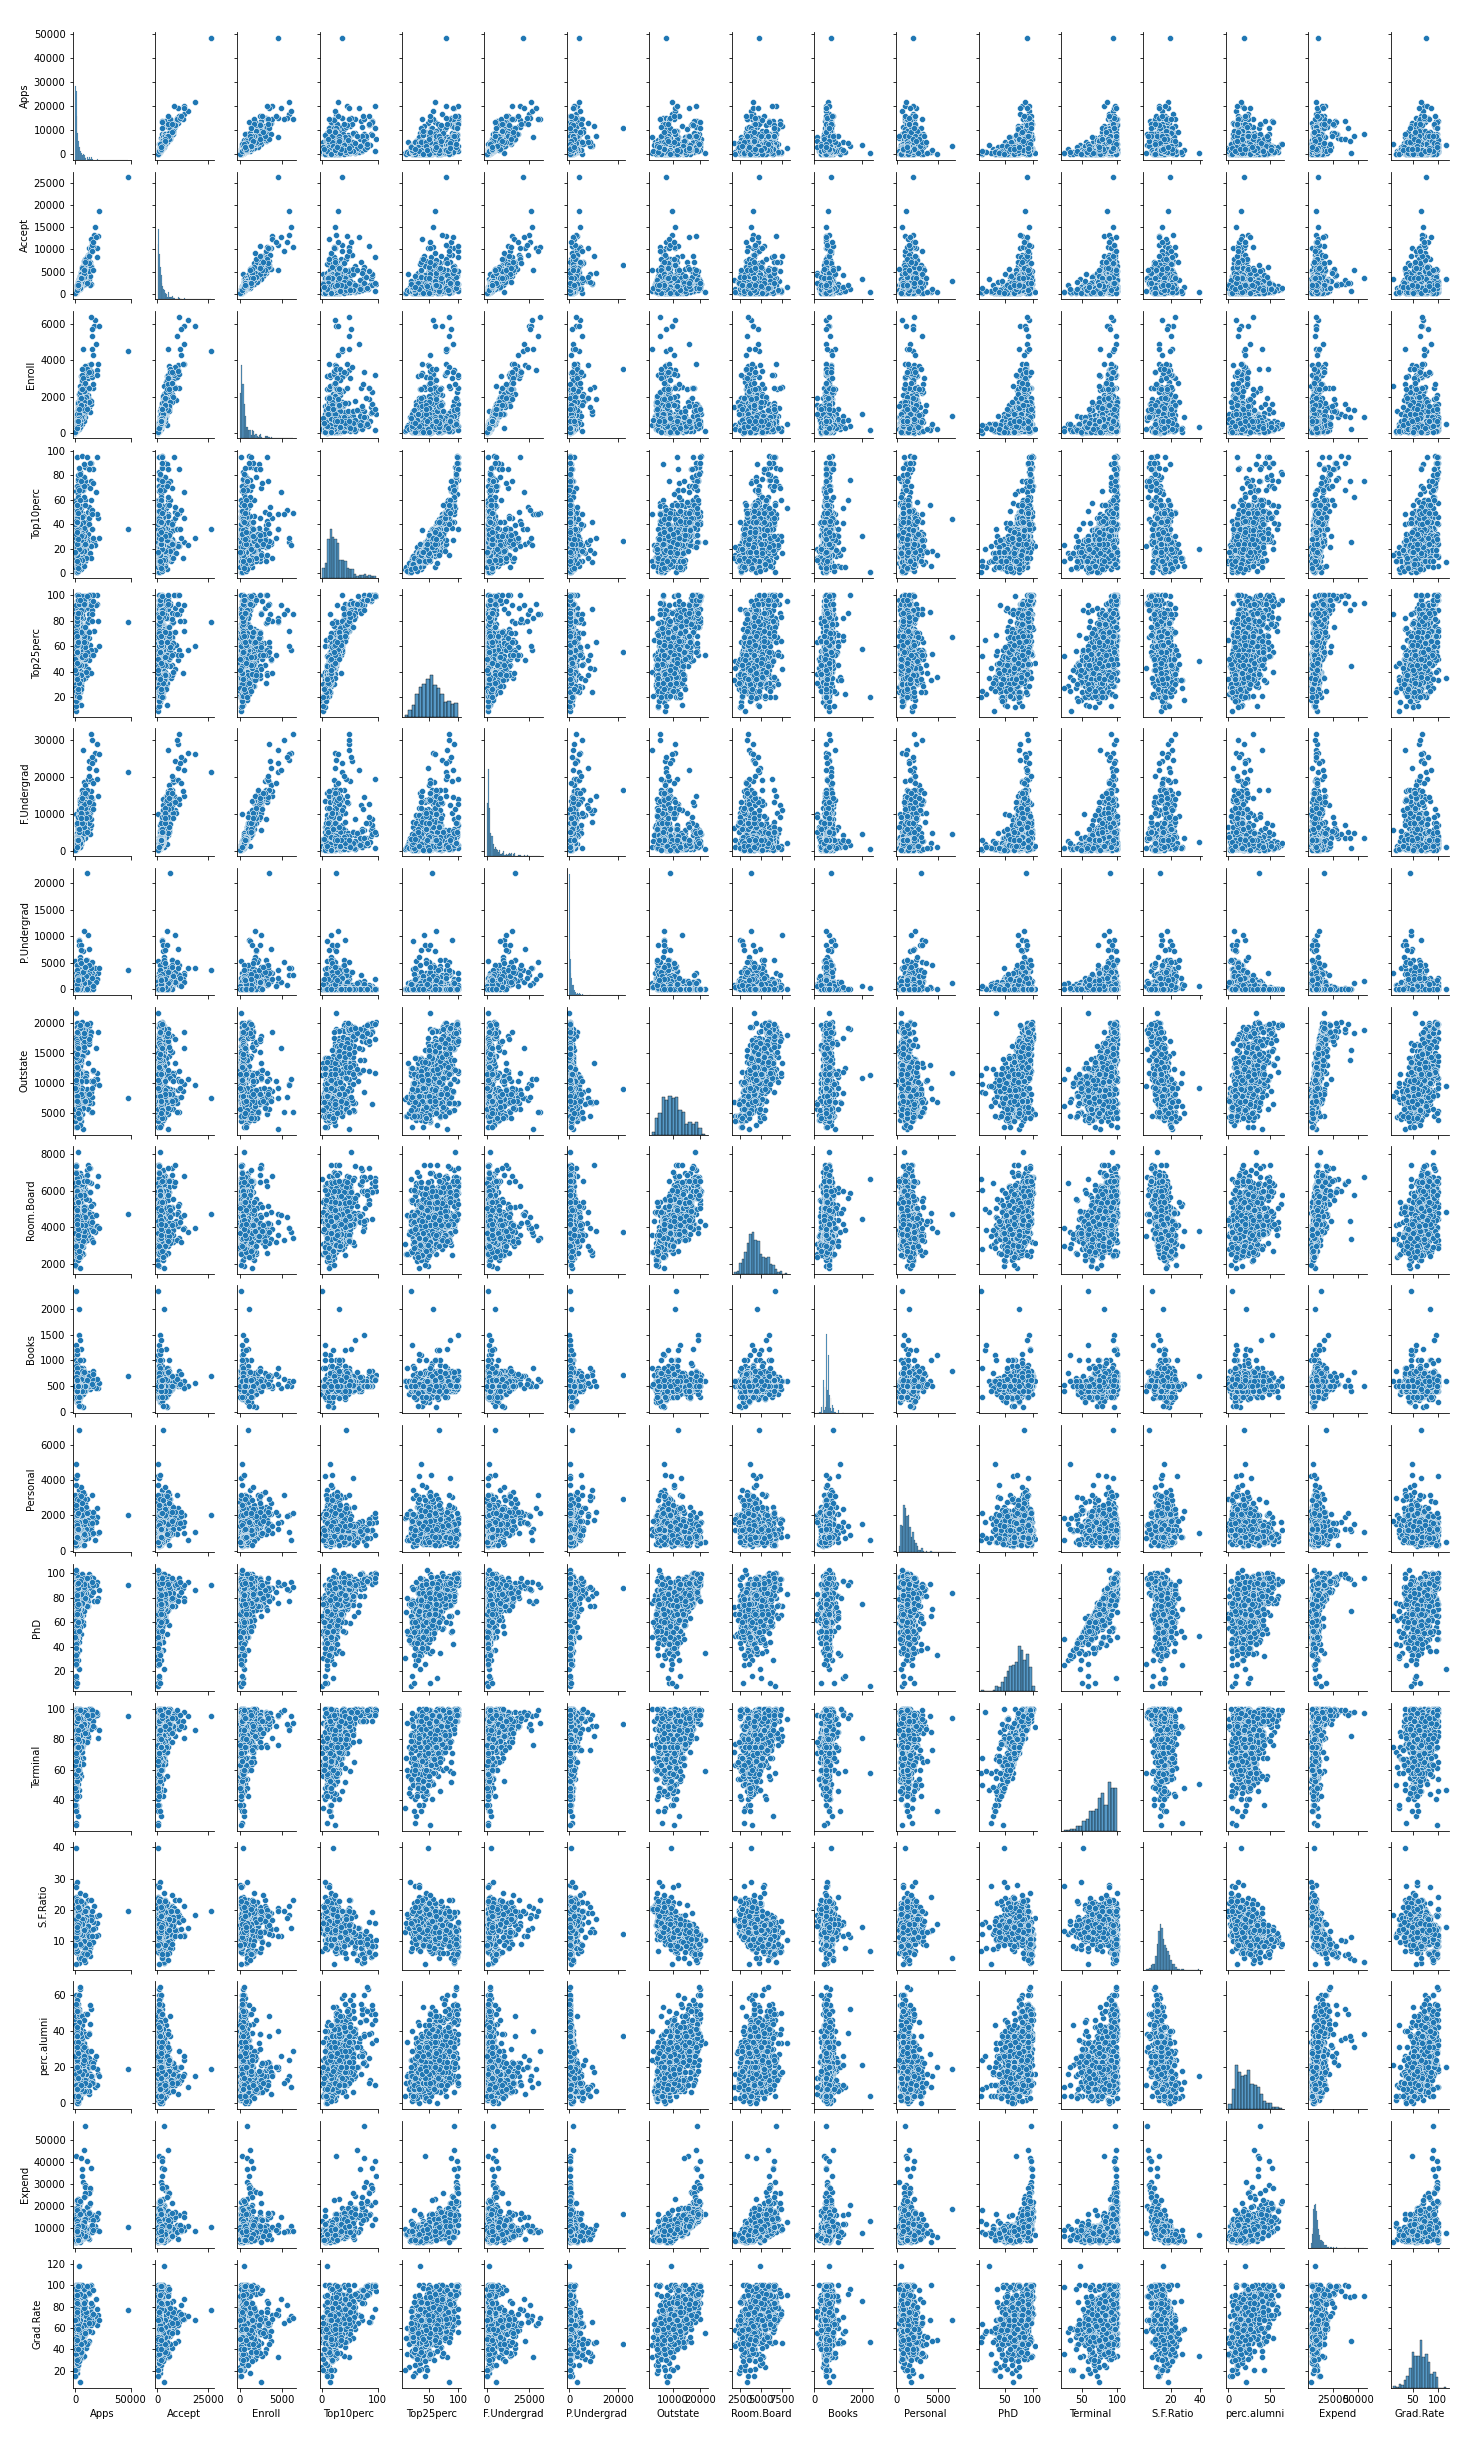

In [52]:
sns.pairplot(df,height=2, aspect=0.6)

<IPython.core.display.Javascript object>


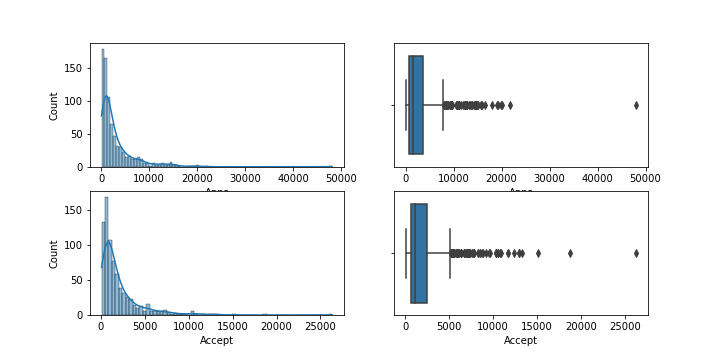

In [80]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
sns.histplot(df['Apps'],kde=True,ax=axes[0][0])
sns.boxplot(x='Apps',data=df,ax=axes[0][1])
sns.histplot(df['Accept'],kde=True,ax=axes[1][0])
sns.boxplot(x='Accept',data=df,ax=axes[1][1])


<IPython.core.display.Javascript object>


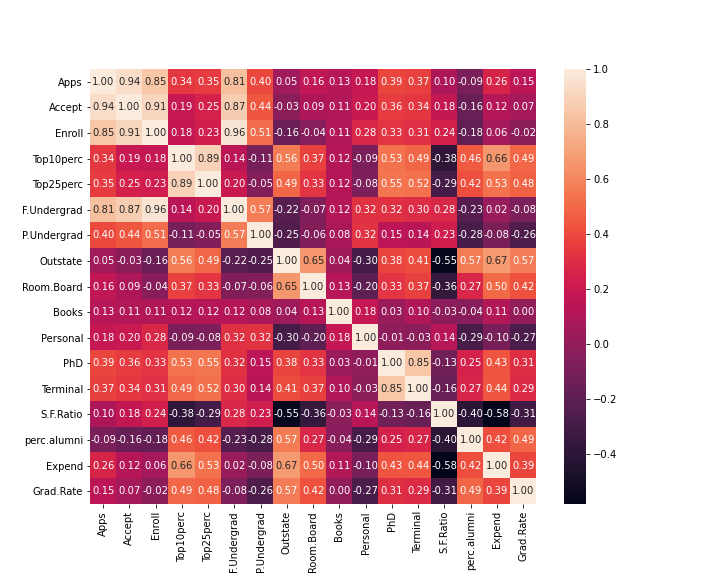

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [85]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

[]
['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


In [92]:
from scipy.stats import zscore
data_scaled=df[num].apply(zscore)
data_scaled

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


In [93]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [95]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,6.355797e-17,1.000644,-0.755134,-0.575441,-0.373254,0.160912,11.658671
Accept,777.0,6.774575e-17,1.000644,-0.794764,-0.577581,-0.371011,0.165417,9.924816
Enroll,777.0,-5.249269e-17,1.000644,-0.802273,-0.579351,-0.372584,0.131413,6.043678
Top10perc,777.0,-2.753232e-17,1.000644,-1.506526,-0.712380,-0.258583,0.422113,3.882319
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,-1.661405e-16,1.000644,-0.734617,-0.558643,-0.411138,0.062941,5.764674
P.Undergrad,777.0,-3.029180e-17,1.000644,-0.561502,-0.499719,-0.330144,0.073418,13.789921
Outstate,777.0,6.515595e-17,1.000644,-2.014878,-0.776203,-0.112095,0.617927,2.800531
Room.Board,777.0,3.570717e-16,1.000644,-2.351778,-0.693917,-0.143730,0.631824,3.436593
Books,777.0,-2.192583e-16,1.000644,-2.747779,-0.481099,-0.299280,0.306784,10.852297


In [117]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


<IPython.core.display.Javascript object>


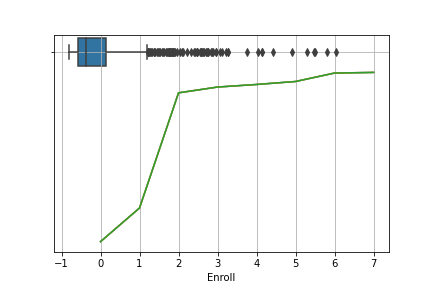

<AxesSubplot:xlabel='Enroll'>

In [158]:
sns.boxplot(x=data_scaled.Enroll)

In [159]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,6.355797e-17,1.000644,-0.755134,-0.575441,-0.373254,0.160912,11.658671
Accept,777.0,6.774575e-17,1.000644,-0.794764,-0.577581,-0.371011,0.165417,9.924816
Enroll,777.0,-5.249269e-17,1.000644,-0.802273,-0.579351,-0.372584,0.131413,6.043678
Top10perc,777.0,-2.753232e-17,1.000644,-1.506526,-0.712380,-0.258583,0.422113,3.882319
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,-1.661405e-16,1.000644,-0.734617,-0.558643,-0.411138,0.062941,5.764674
P.Undergrad,777.0,-3.029180e-17,1.000644,-0.561502,-0.499719,-0.330144,0.073418,13.789921
Outstate,777.0,6.515595e-17,1.000644,-2.014878,-0.776203,-0.112095,0.617927,2.800531
Room.Board,777.0,3.570717e-16,1.000644,-2.351778,-0.693917,-0.143730,0.631824,3.436593
Books,777.0,-2.192583e-16,1.000644,-2.747779,-0.481099,-0.299280,0.306784,10.852297


In [164]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8, random_state=123)
df_pca = pca.fit_transform(data_scaled)
df_pca.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00],
       [-8.79386137e-01,  4.69253269e-02,  3.08740489e-01, ...,
        -1.28288447e-01, -5.52585842e-01,  6.27409633e-01]])

In [165]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [166]:
var_exp = pca.explained_variance_ratio_

In [167]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621])

In [174]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222])

In [178]:
plt.plot(pca.explained_variance_)
plt.grid()

<IPython.core.display.Javascript object>


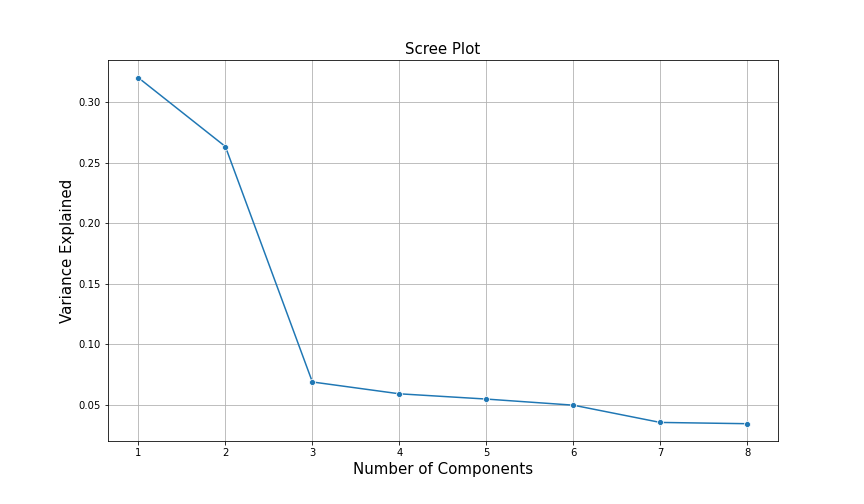

In [168]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [169]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(data_scaled))
df_pca_loading.shape

(8, 17)

In [170]:
df_pca_loading.head(8)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
5,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163
6,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486,-0.025076,0.061042,0.108529,0.209744,-0.149692,0.633790,-0.001096,-0.028477,0.219259,0.243321,-0.226584,0.559944
7,-0.103090,-0.056271,0.058662,-0.122678,-0.102492,0.078890,0.570784,0.009846,-0.221453,0.213293,-0.232661,-0.077040,-0.012161,-0.083605,0.678524,-0.054159,-0.005336


In [171]:
from matplotlib.patches import Rectangle

<IPython.core.display.Javascript object>


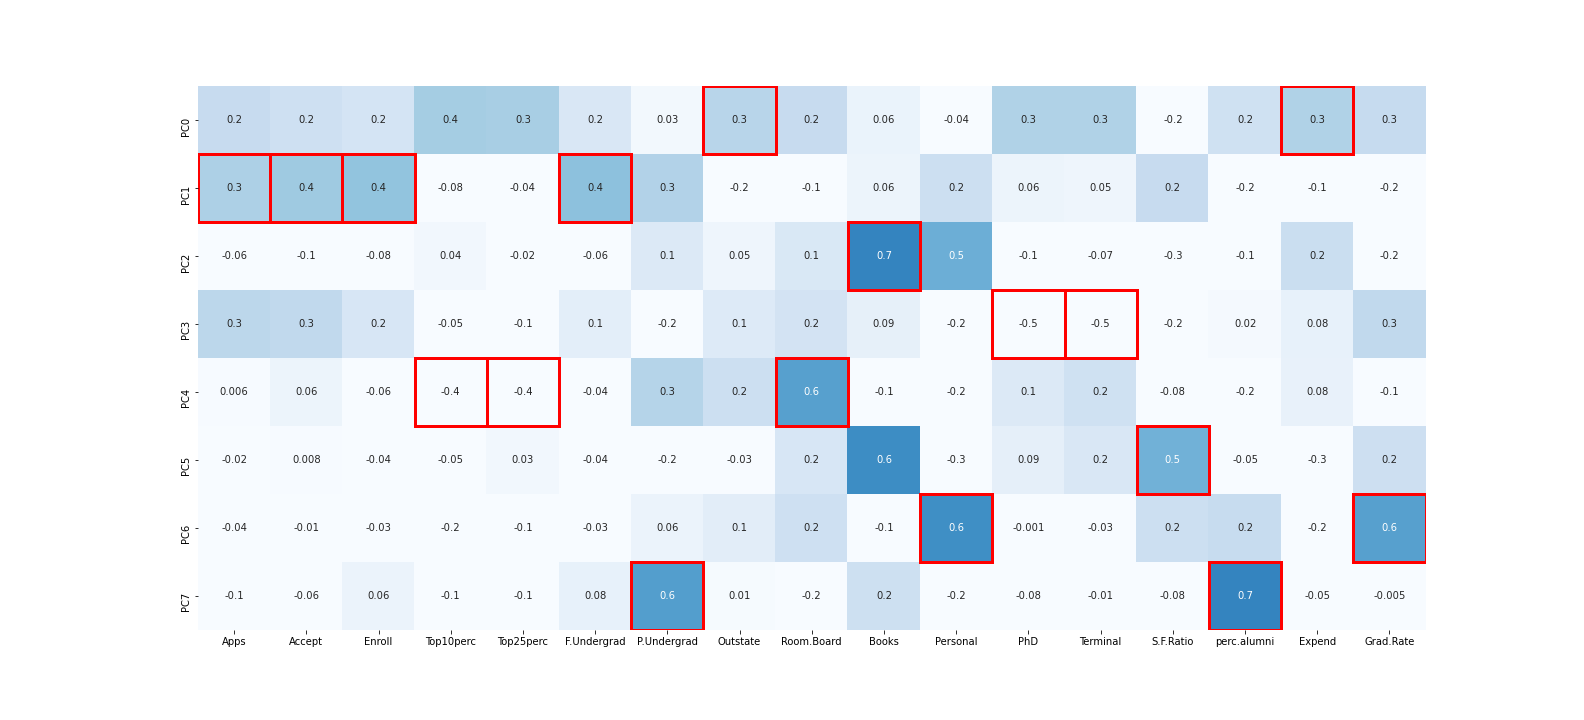

In [173]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [184]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8'],
                                    index = data_scaled.columns)
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293


In [191]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8']]
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293


<IPython.core.display.Javascript object>


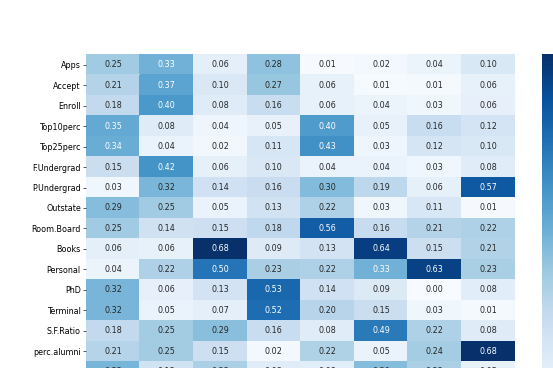

In [189]:
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [192]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347])